In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import plotly.express as px
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from plotly.figure_factory import create_dendrogram
from scipy.cluster.hierarchy import fcluster, ward, dendrogram, leaves_list
from scipy.spatial.distance import pdist
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics.pairwise import cosine_similarity

sns.set_style('white')

In [40]:
# t2_new.csv文件相对于T1增加了新的分类特征“ A, B, T”，根据神经元分支的分布，将852个数据重新分为A、B、T三个大类。
# 其中，A类神经元的顶树突在XY成像平面中排列良好
# B类神经元具有沿Z轴定向的顶树突，即与XY成像平面正交，因此在原始图像中基本可见基底树突
t2_df = pd.read_csv('./t2_new.csv', sep=',', header=0, index_col=0)
t2_df.index = [i.split('.')[0] for i in t2_df.index]
labels_ori = t2_df[['BrainRgn', 'Age', 'Sex']]
hue_type = 'BrainRgn'
labels = labels_ori[[hue_type]]
df = t2_df.iloc[:, 4:]
df = df.loc[labels.index,:]
df['hue'] = labels

# 绘制PL和IPL脑区的聚类树状图

In [42]:
# 选择PL, IPL数据，分别绘制两个脑区下的dendrogram（聚类树状图）

def func(X):
    return pdist(X, metric='cosine')
x_den0 = x_std[np.hstack(np.argwhere(figure_df['hue'].values=='PL')),:]
print('x_den0 shape ', x_den0.shape)
x_den1 = x_std[np.hstack(np.argwhere(figure_df['hue'].values=='IPL')),:]
print('x_den1 shape ', x_den1.shape)


x_den0 shape  (91, 22)
x_den1 shape  (112, 22)


In [43]:
# 画PL的dendrogram图

fig = create_dendrogram(x_den0, 
                        colorscale=['rgb(55,126,184)','rgb(55,126,184)', 'rgb(55,126,184)'],
                        color_threshold=4.5,
                        distfun = func,
                        linkagefun=ward
                       )

fig.update_layout(template='plotly_white',        
                  width=1000,
                  height=500,
                  xaxis = {'tickangle':90},
                  title='dendrogram '+hue_type+' PL',
                 )
fig.show()


In [44]:
# 画IPL的dendrogram图


fig = create_dendrogram(x_den1, colorscale=['red','red', 'red'],
                        color_threshold=7,
                        distfun = func,
                        linkagefun=ward)
fig.update_layout(template='plotly_white',        
                  width=1000,
                  height=500,
                  xaxis = {'tickangle':90},
                  title='dendrogram '+hue_type+' IPL',
                 )
fig.show()


# 所有数据下的聚类树状图、热力图及NMI直方图

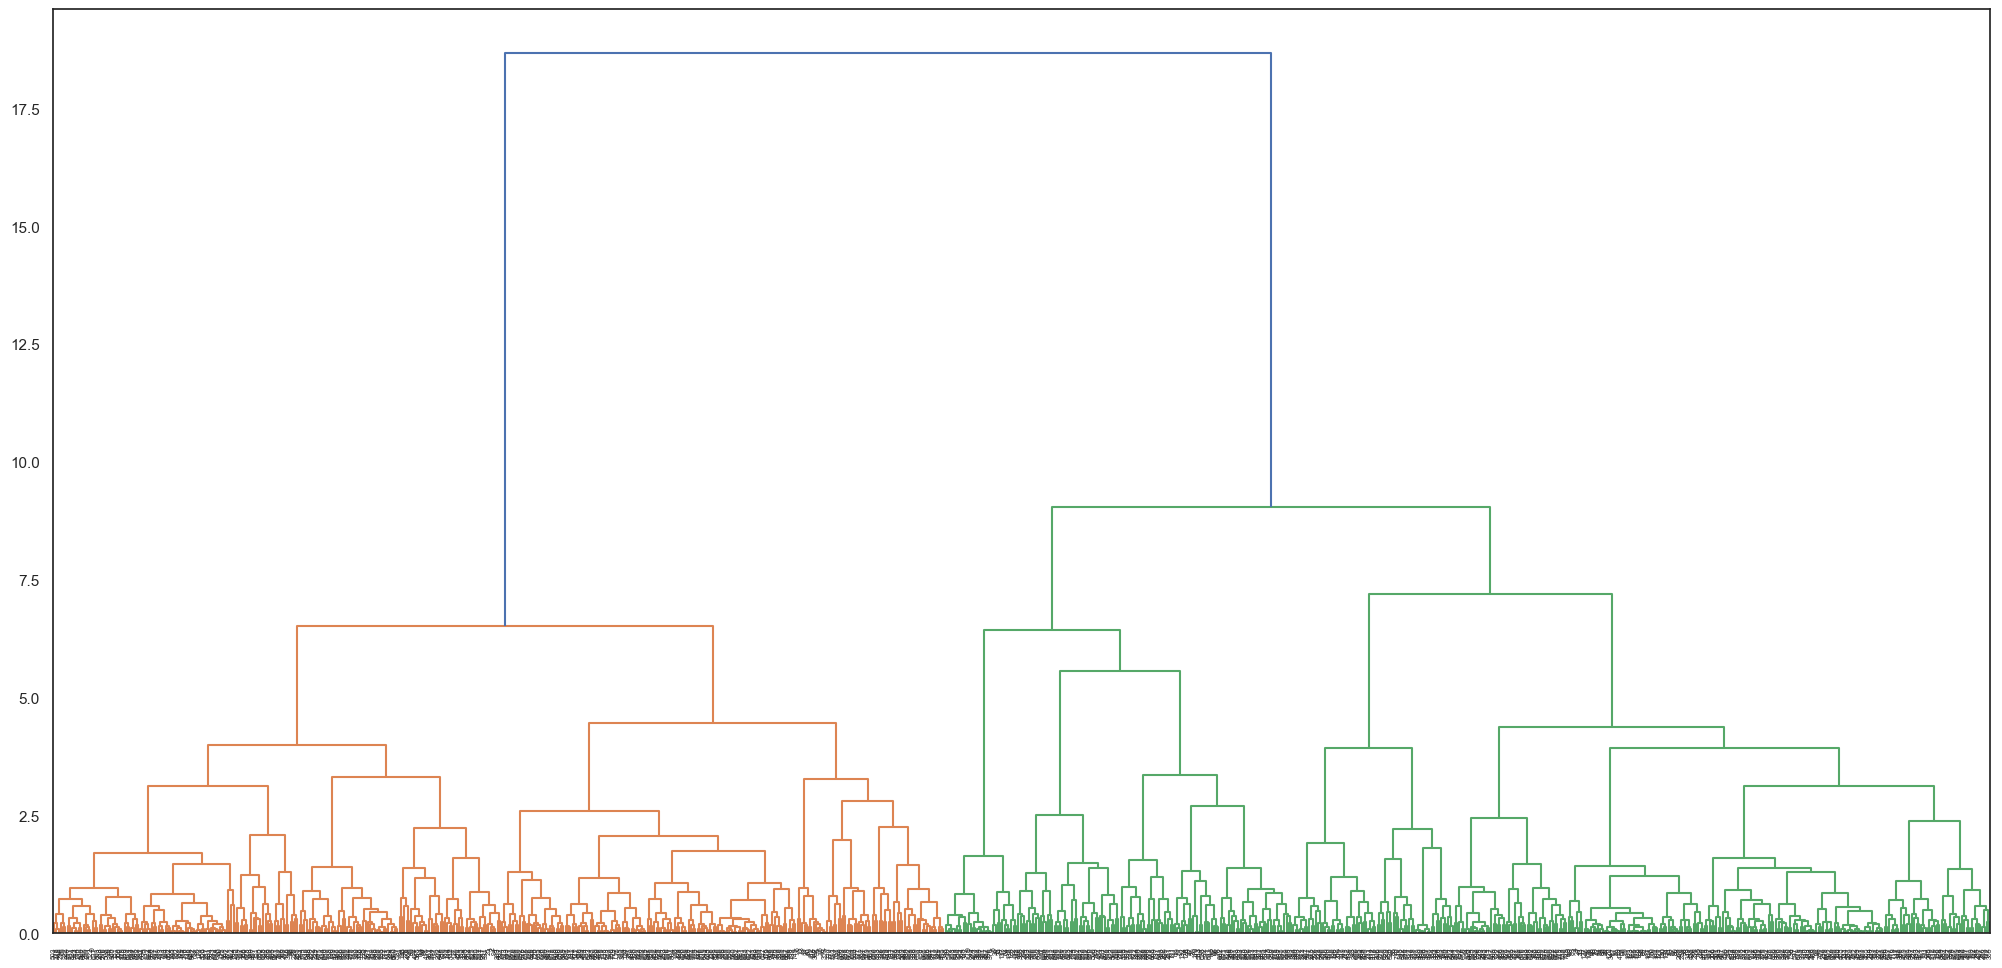

In [45]:
# 以x_std作为输入，绘制所有数据（852）的聚类树状图

labels_ori = labels_ori.loc[figure_df.index,:]
sns.set_style('white')
Z = ward(func(x_std))
fig = plt.figure(figsize=(25, 12))
dn = dendrogram(Z)
# plt.show()
plt.savefig('./dendrogram.png', dpi=200, bbox_inches='tight')

[1 2 3 4 5 6]
[1 1 1 2 6 2 2 2 3 3 2 2 3 6 6 3 2 4 2 2 3 2 3 5 6 1 1 1 1 5 4 1 4 2 3 2 3
 2 6 4 6 6 6 6 6 1 6 4 1 6 6 6 6 6 6 6 6 1 1 6 1 6 6 4 3 1 4 6 6 6 6 6 4 6
 4 1 4 6 2 4 2 4 4 6 1 5 1 6 6 6 6 1 1 6 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4
 4 2 4 1 6 4 5 4 6 6 6 6 6 2 3 4 6 6 6 6 6 4 3 1 3 2 3 3 1 6 6 5 6 6 6 6 6
 6 5 5 6 6 1 5 2 6 1 1 1 1 4 1 2 1 1 1 6 6 6 2 2 6 1 6 2 1 2 1 1 2 1 1 4 1
 2 6 6 1 1 4 6 1 1 5 1 5 2 1 4 5 4 1 5 1 4 6 1 1 1 1 1 6 1 1 4 1 1 4 2 2 2
 1 5 6 6 5 6 1 1 4 5 6 1 2 1 6 4 5 6 6 4 4 6 6 5 5 1 1 1 1 4 4 1 4 6 4 1 4
 4 4 4 4 5 4 6 6 6 6 1 6 5 5 5 3 5 1 5 6 6 5 5 5 5 5 1 6 6 2 6 1 6 1 2 5 6
 1 1 1 1 2 6 1 1 5 1 5 6 6 6 6 6 6 6 6 6 5 1 5 6 2 5 6 1 1 6 5 6 4 2 2 1 2
 4 1 2 2 1 2 2 1 6 3 6 6 5 2 6 3 6 4 1 6 3 3 3 3 3 2 2 1 3 2 3 3 4 6 1 4 6
 5 6 5 2 5 5 3 2 1 1 1 2 2 2 2 6 6 6 1 2 1 1 6 5 6 5 5 4 6 6 1 6 1 3 5 1 6
 6 6 5 5 2 5 1 5 1 1 1 5 1 6 1 1 4 1 1 6 1 2 2 2 1 5 6 1 2 6 6 2 5 6 2 2 6
 2 1 6 4 6 6 6 2 2 6 2 2 6 1 6 6 5 6 5 1 5 6 6 5 6 6 6 1 6 6 6 6 6 6 6 1 1
 6 6 6 4 6 

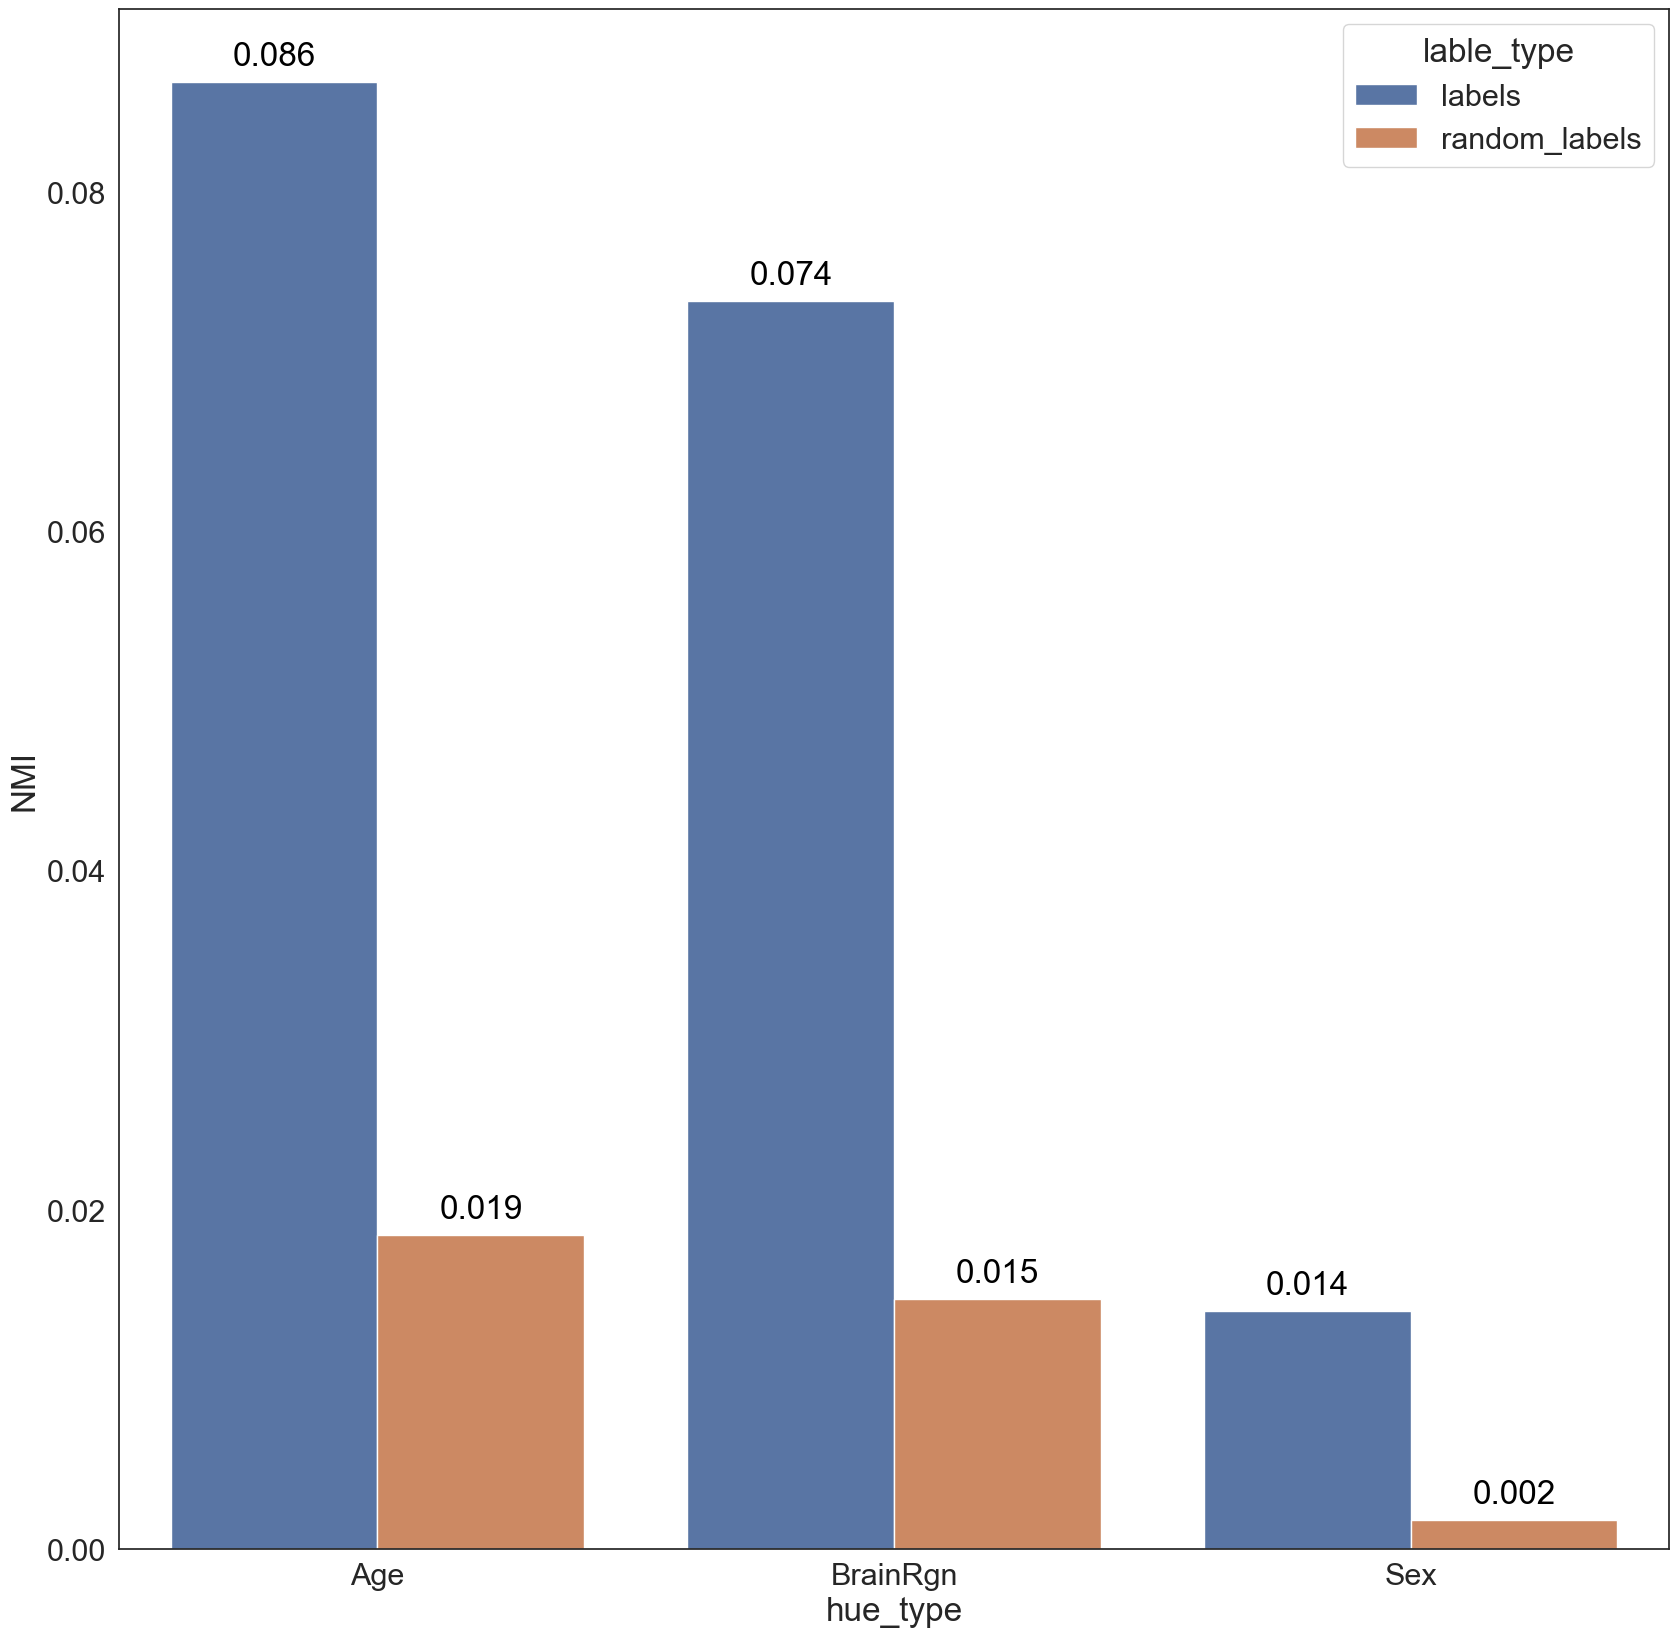

In [46]:
# 根据热力分布图的叶节点将神经元分为6类，并按照类别重新排序
# 除根据聚类树图根结点的分类标签外，给每个数据随机插入10个标签
# 分别计算NMI(normalized mutual information，用于衡量在特定标签划分下数据间的分布差异情况，其值越大，分布差异越大)值，绘制直方图
# NMI直方图进一步证明了树状图分类标签的合理性


# 将所有数据分为六类
labels0 = fcluster(Z, t=6, criterion='distance')
labels_ori['labels'] = labels0
for i in range(10):
    labels_ori['random_labels'+str(i+1)] = np.random.randint(1,len(np.unique(labels0)),len(labels0))
print(np.unique(labels0))
print(labels0)
labels_ori

# 根据叶节点的分类对数据进行重排
new_index = leaves_list(Z)
x_std_re = x_std[new_index]
labels_ori_re = labels_ori.iloc[new_index, :]
print(x_std_re.shape)
labels_ori_re

# 分别计算叶节点标签与随机标签下的NMI值
MI_df = pd.DataFrame(columns=['lable_type', 'hue_type', 'NMI'])
for lt_i in ['labels']+['random_labels'+str(i+1) for i in range(10)]:
    for ht_j in ['BrainRgn', 'Age', 'Sex']:
        if lt_i.startswith('random'):
            lt_i1 = 'random_labels'
        else:
            lt_i1 = lt_i
        tmp_df = pd.DataFrame({'lable_type':[lt_i1], 'hue_type': [ht_j], 'NMI':[normalized_mutual_info_score(labels_ori[lt_i], labels_ori[ht_j])]})
        MI_df = pd.concat([MI_df, tmp_df], axis=0)

group_values = MI_df.groupby(['hue_type','lable_type']).mean().reset_index()
coordinates_dict = {'Age':0, 'BrainRgn':1, 'Sex':2}
offset_dict = {'labels':-0.2, 'random_labels':0.2}

# 绘制NMI的直方图
sns.set(style='white', font_scale=2,)
plt.figure(figsize=(20,20))
g = sns.barplot(data = group_values, x='hue_type', y='NMI', hue='lable_type')

for index,row in group_values.iterrows():
    g.text(coordinates_dict[row.hue_type]+offset_dict[row.lable_type], row.NMI+0.001, round(row.NMI,3),color="black",ha="center")
plt.savefig('./MI.png', dpi=200, bbox_inches='tight')

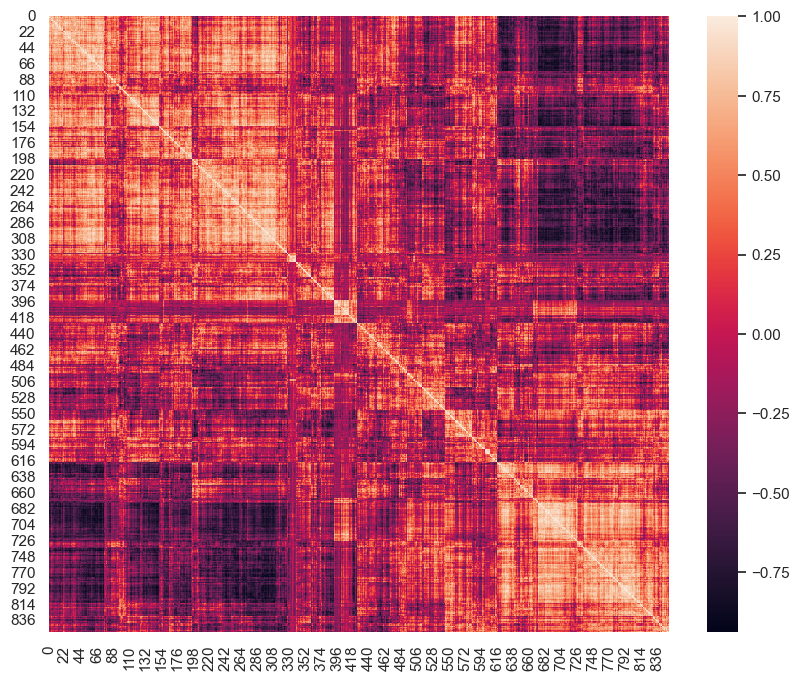

In [47]:
# corre_matrix下的热力分布图
corre_matrix = np.eye((len(labels_ori_re)), len(labels_ori_re)) #协方差矩阵，np.eye：生成对角矩阵；len：取字符串中字符数
for i in range(len(corre_matrix)):
    for j in range(len(corre_matrix)):
        if j == i:
            continue

#         tmp = np.corrcoef(x_pca_re[i], x_pca_re[j])
#         corre_matrix[i,j] = tmp[0][1]
        tmp = cosine_similarity(x_std_re[i].reshape(1, -1), x_std_re[j].reshape(1, -1))#计算852个数据两两特征间的余弦相似度
        corre_matrix[i,j] = tmp
corre_matrix
sns.set(style='white', )
f, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(corre_matrix, ax=ax)
plt.savefig('corre_matrix_heatmap.png', dpi=200, bbox_inches='tight')